##Imports

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.layers import Input, Dense 
import matplotlib.pyplot as plt

## Actividad:

Entrene un Autoencoder para visualizar en
dos dimensiones el comportamiento de la base de
datos Fashion MNIST. Realice una visualización
similar usando PCA (Análisis de Componentes
Principales) y compare los resultados obtenidos. Adicionalmente, verifique la capacidad de generar nuevas imágenes con el Autoencoder entrenado. 

##Tamaño del dataset

In [ ]:
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1
num_classes = 10    #T-shirt/Trouser/Pullover/Dress/Coat/Sandal/Shirt/Sneaker/Bag/Ankle Boot

##Separación y normalización Datos

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


##Estructura Autoencoder

In [ ]:
input_img = Input(shape=(height * width,))    #Entrada de 28x28 = 784

encoded = Dense(height * width//2, activation='relu')(input_img)   #Capa de 784/2 = 392
encoded = Dense(height * width//4, activation='relu')(encoded)    #Capa de 784/ = 196
encoded = Dense(height * width//6, activation='relu')(encoded)    #Capa de 784/8 = 130
encoded = Dense(height * width//8, activation='relu')(encoded)    #Capa de 784/8 = 98

y = Dense(height * width//392, activation='relu')(encoded)    #Capa latente de 784/392 = 2

decoded = Dense(height * width//8, activation='relu')(y)    #Capa de 784/8 = 98
decoded = Dense(height * width//6, activation='relu')(decoded)    #Capa de 784/6 = 130
decoded = Dense(height * width//4, activation='relu')(decoded)    #Capa de 784/4 = 196
decoded = Dense(height * width//2, activation='relu')(decoded)    #Capa de 784/2 = 392

z = Dense(height * width, activation='sigmoid')(decoded)    #Salida de 28x28 = 784

###Estructura Modelo

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 130)               25610     
                                                                 
 dense_3 (Dense)             (None, 98)                12838     
                                                                 
 dense_4 (Dense)             (None, 2)                 198       
                                                                 
 dense_5 (Dense)             (None, 98)                294   

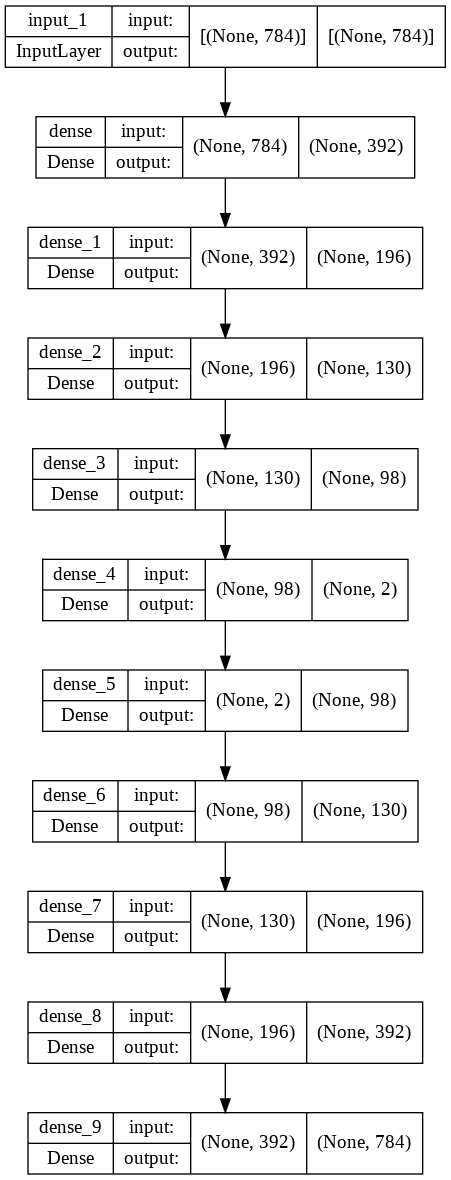

In [ ]:
autoencoder = Model(input_img, z)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='deepAutoencoder.png', show_shapes=True)

###Enttrenamiento Modelo

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 15s 56ms/step - loss: 0.4544 - val_loss: 0.3989
Epoch 2/50
235/235 [==============================] - 16s 66ms/step - loss: 0.3675 - val_loss: 0.3492
Epoch 3/50
235/235 [==============================] - 10s 42ms/step - loss: 0.3429 - val_loss: 0.3410
Epoch 4/50
235/235 [==============================] - 11s 48ms/step - loss: 0.3362 - val_loss: 0.3361
Epoch 5/50
235/235 [==============================] - 10s 41ms/step - loss: 0.3327 - val_loss: 0.3332
Epoch 6/50
235/235 [==============================] - 10s 41ms/step - loss: 0.3300 - val_loss: 0.3311
Epoch 7/50
235/235 [==============================] - 10s 44ms/step - loss: 0.3279 - val_loss: 0.3301
Epoch 8/50
235/235 [==============================] - 19s 82ms/step - loss: 0.3263 - val_loss: 0.3275
Epoch 9/50
235/235 [==============================] - 12s 50ms/step - loss: 0.3250 - val_loss: 0.3259
Epoch 10/50
235/235 [==============================] - 9s 39ms/step - loss: 0.3236

###Predicciones

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
encoder = Model(input_img,y)
latent_space = encoder.predict(x_test)

##Instalción MGLEARN

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b2aa24bce4835a3aa4dc858dfac2b186a3565e0e9023e4dc56116fcf5485739d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Visualización Espacio Latente

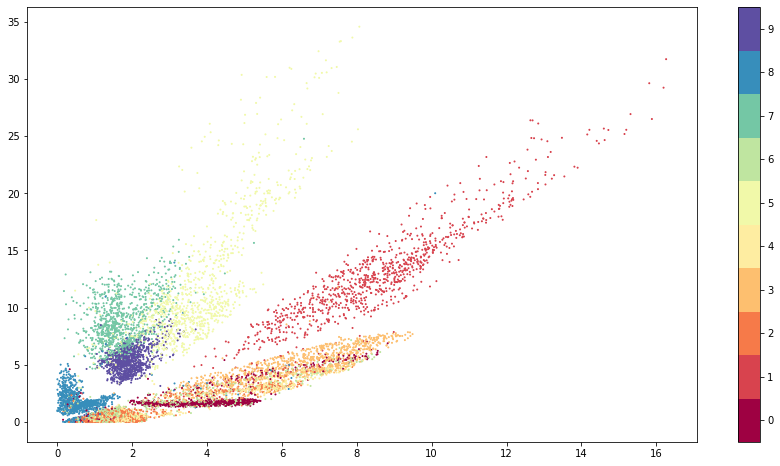

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(latent_space[:,0], latent_space[:,1], s=1, c=y_test, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

Text(0, 0.5, 'Segunda Dimensión')

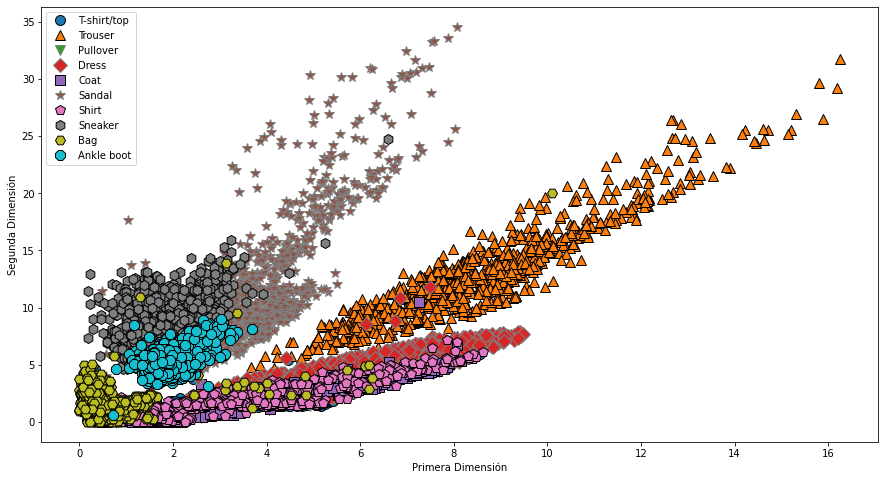

In [ ]:
import mglearn
plt.figure(figsize=(15, 8))
mglearn.discrete_scatter(latent_space[:, 0], latent_space[:, 1], y_test)
plt.legend(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], loc="best")
plt.xlabel("Primera Dimensión")
plt.ylabel("Segunda Dimensión")

##Visualizar imágenes originales y predicciones

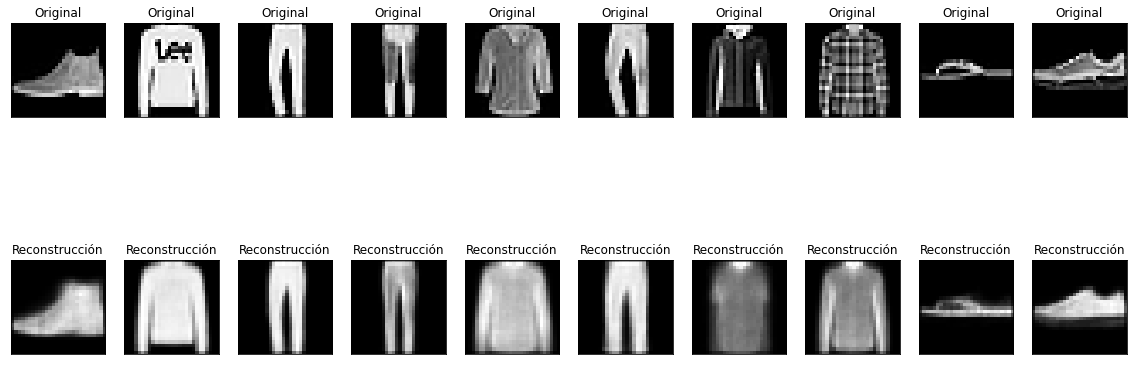

In [ ]:
import matplotlib.pyplot as plt

n = 10    #Cantidad de números a mostrar
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title('Original')
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.title('Reconstrucción')
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##PCA para FASHION MNIST

###Módulos

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)   #Cantidad de variables o parámetros que se van a extraer
pca.fit(x_test)
x_pca = pca.transform(x_test)
print("Tamaño Original: {}".format(str(x_test.shape)))
print("Tamaño Reducido: {}".format(str(x_pca.shape)))

Tamaño Original: (10000, 784)
Tamaño Reducido: (10000, 2)


###Visualización del espacio latente

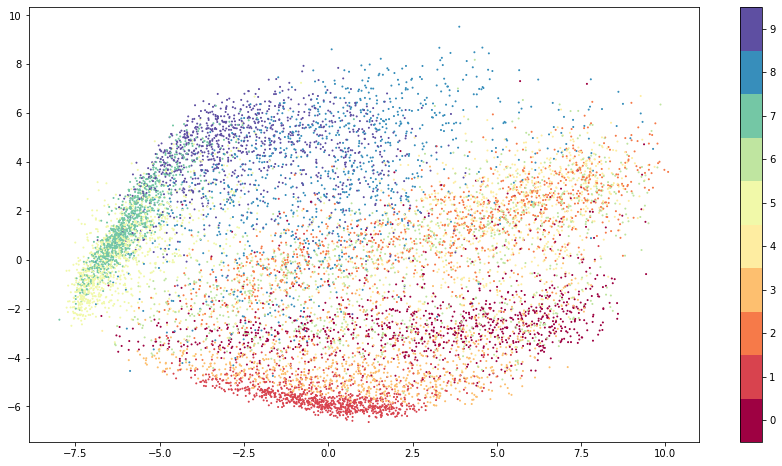

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(x_pca[:,0], x_pca[:,1], s=1, c=y_test, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

###Visualización de características con MGLEARN

Text(0, 0.5, 'Segunda Dimensión')

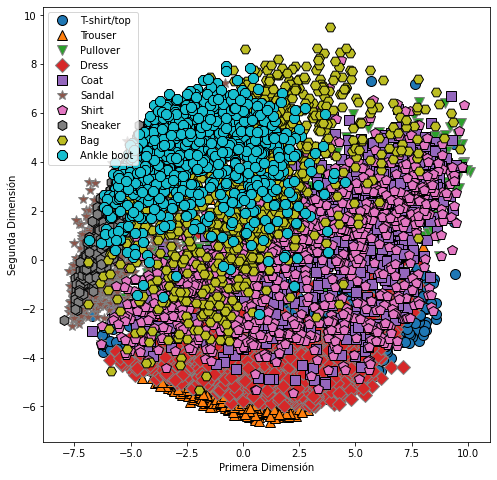

In [ ]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], y_test)
plt.legend(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], loc="best")
plt.xlabel("Primera Dimensión")
plt.ylabel("Segunda Dimensión")